In [113]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf
import seaborn as sns
pd.set_option('display.max_columns', None)

df = pd.read_csv('train.csv', encoding='cp1252')
df.replace(to_replace=[np.nan, "NA"], value=0, inplace=True)

In [114]:
import numpy as np
int64_bool = df.apply(lambda x: (True if x.dtype == np.int64 else False),axis = 0)
df = df[df.columns[int64_bool]]


C:\Users\Oscar Paredez\AppData\Local\Temp\ipykernel_2260\615468262.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(eliminate, 1, inplace=True)


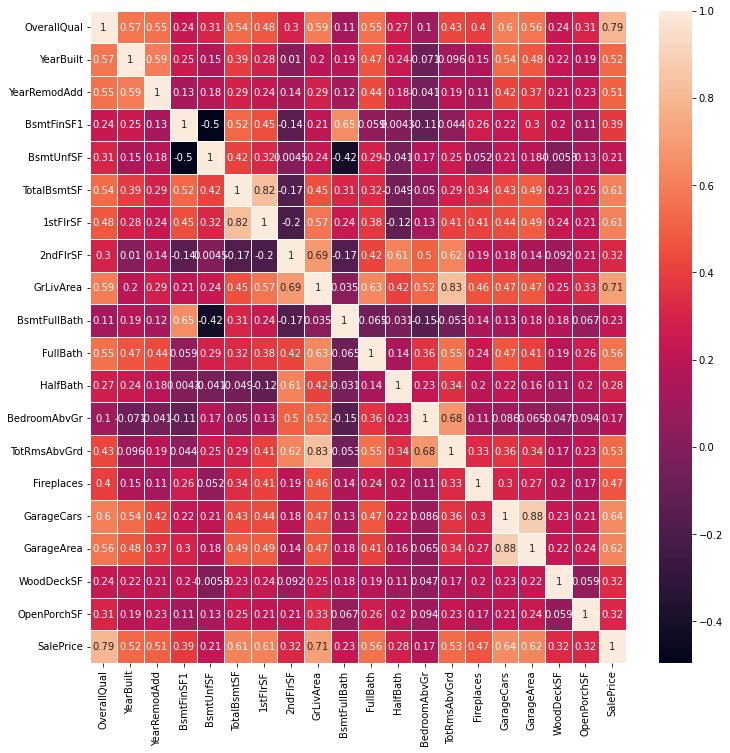

In [115]:

import matplotlib.pyplot as plt

eliminate = ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
df.drop(eliminate, 1, inplace=True)
corrMatrix = df.corr()

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

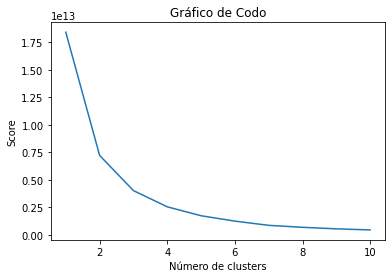

In [116]:
import pyclustertend
import sklearn.cluster as cluster

dfarray = df[['SalePrice', 'SalePrice']].values
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(dfarray)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()



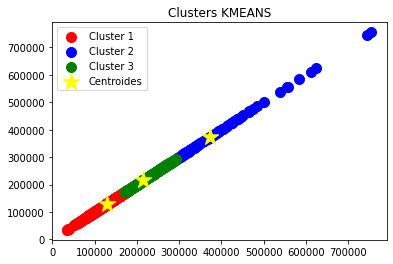

In [117]:
km = cluster.KMeans(n_clusters=3).fit(dfarray)
centroides = km.cluster_centers_
especies = km.predict(dfarray)
plt.scatter(dfarray[especies == 0, 0], dfarray[especies == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(dfarray[especies == 1, 0], dfarray[especies == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(dfarray[especies == 2, 0], dfarray[especies == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Clusters KMEANS")
plt.legend()
plt.show()

# Cluster 1 (Economicas): 35,000 - 150,000
# Cluster 2 (Intermedias): 150,000 - 250,000
# Cluster 3 (Caras): 240,000 - 750,000
# Aproximadamente



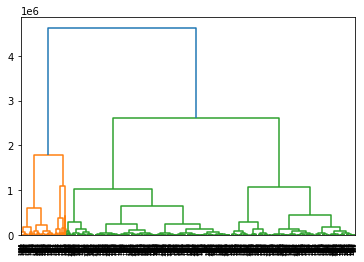

In [118]:
import scipy.cluster.hierarchy as sch
dendograma = sch.dendrogram(sch.linkage(dfarray[0:2500][:], method='ward'))

In [121]:
# Numero 4
minPrice = df['SalePrice'].min()
maxPrice = df['SalePrice'].max()
avg = (maxPrice - minPrice) / 3
df['Clasificacion'] = df['SalePrice']

df['Clasificacion'][df['SalePrice'] < minPrice + avg] = 0
df['Clasificacion'][df['SalePrice'] >= minPrice + avg] = 1
df['Clasificacion'][df['SalePrice'] >= minPrice + avg * 2] = 2

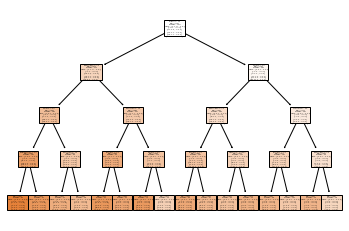

In [122]:
# Numero 5 y 6
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import random

Y = df.drop(['SalePrice'], axis=1)  #La variable respuesta
X = df #El resto de los datos

X_train, X_test,y_train, y_test = train_test_split(X, Y,test_size=0.3, train_size=0.7)
# y_train
# X_train
arbol = DecisionTreeClassifier(max_depth=4, random_state=42) 
arbol = arbol.fit(X_train, y_train) 

tree.plot_tree(arbol,feature_names=df.columns, class_names=['0','1','2'], filled=True )
plt.savefig('out.pdf')

In [123]:
y_pred = arbol.predict(X_test)
print(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(
    y_test, y_pred, average='weighted'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='weighted'))

[[   5 1954 1970 ...    0    0    0]
 [   7 2006 2006 ...    0    0    0]
 [   5 1954 1970 ...    0    0    0]
 ...
 [   8 1995 2008 ...    0    0    1]
 [   7 2006 2006 ...    0    0    0]
 [   7 2006 2006 ...    0    0    0]]


ValueError: multiclass-multioutput is not supported

C:\Users\Oscar Paredez\AppData\Local\Temp\ipykernel_2260\3108395239.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Clasificacion', 1)


[Text(465.0, 755.0, 'SalePrice <= 274935.0\nmse = 0.098\nsamples = 1022\nvalue = 1.093'),
 Text(232.5, 453.0, 'mse = 0.0\nsamples = 913\nvalue = 1.0'),
 Text(697.5, 453.0, 'SalePrice <= 528418.5\nmse = 0.24\nsamples = 109\nvalue = 1.872'),
 Text(465.0, 151.0, 'mse = 0.0\nsamples = 102\nvalue = 2.0'),
 Text(930.0, 151.0, 'mse = 0.0\nsamples = 7\nvalue = 0.0')]

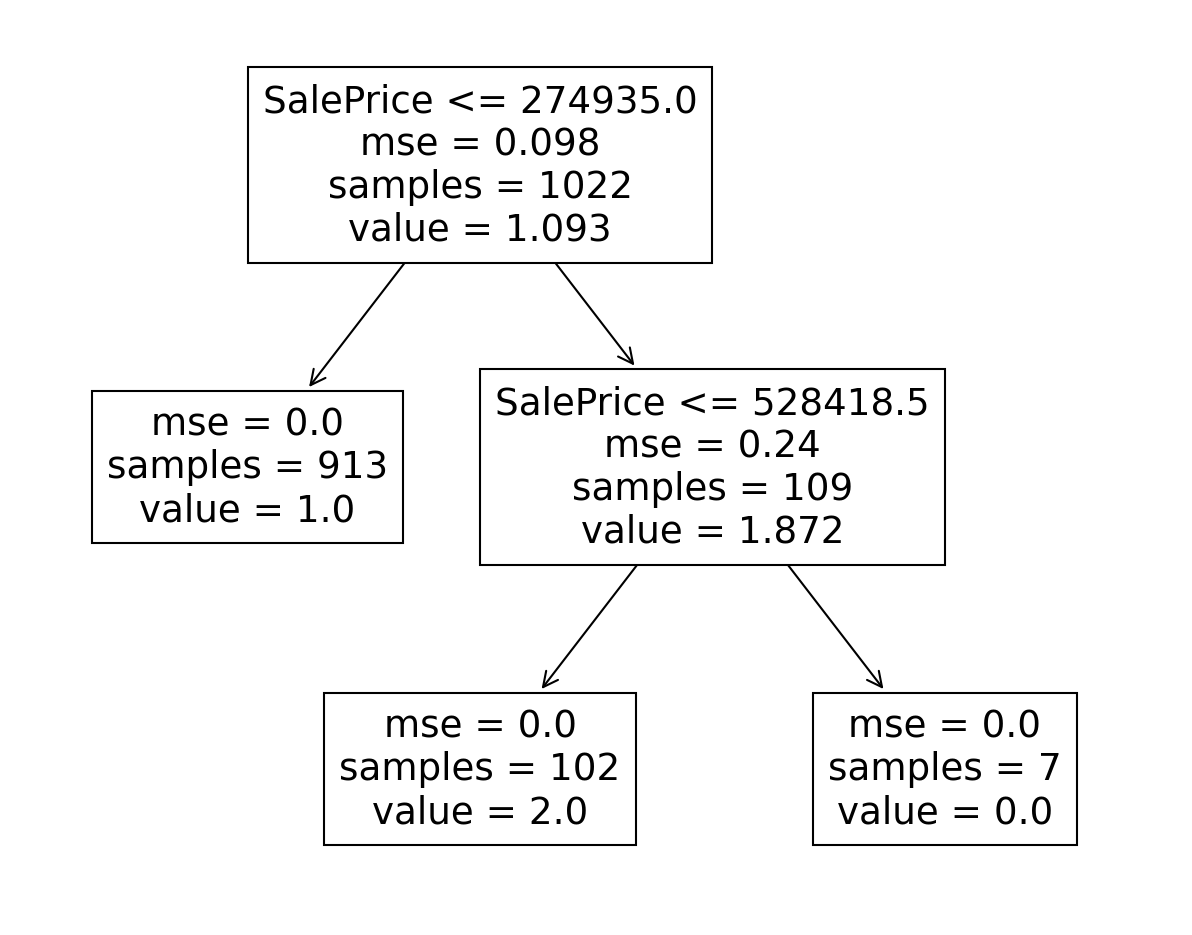

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import plot_tree
import sklearn.preprocessing

ord_enc = sklearn.preprocessing.OrdinalEncoder()
nuevo = 'Clasificacion_code'
df[nuevo] = ord_enc.fit_transform(df[['Clasificacion']])
df = df.drop('Clasificacion', 1)

Y = df['Clasificacion_code'] #La variable respuesta
X = df.drop(['Clasificacion_code'], axis=1) #El resto de los datos

X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=44)

model = DecisionTreeRegressor(random_state=44)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

model.fit(X_train, y_train)
predictions  = model.predict(X_test)

plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns)
